## The forecasting model: Facebook’s Prophet
The most commonly used models for forecasting predictions are the autoregressive models. Briefly, the autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term).

Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. We will use this state-of-the-art model: the Prophet model. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.
The mathematical equation behind the Prophet model is defined as:

**y(t) = g(t) + s(t) + h(t) + e(t)**

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.

s(t) represents periodic changes (weekly, monthly, yearly).

h(t) represents the effects of holidays (recall: Holidays impact businesses).

e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

# APPLE

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("/content/AAPL.csv")
data.head()

,date,open,high,low,close,volume
0,12-12-1980,0.0992,0.0996,0.0992,0.0992,469033600
1,15-12-1980,0.0945,0.0945,0.0940,0.0940,175884800
2,16-12-1980,0.0875,0.0875,0.0871,0.0871,105728000
3,17-12-1980,0.0893,0.0897,0.0893,0.0893,86441600
4,18-12-1980,0.0919,0.0923,0.0919,0.0919,73449600


In [34]:
data.describe()

,open,high,low,close,volume
count,11063.000000,11063.000000,11063.000000,11063.000000,1.106300e+04
mean,22.696507,22.939048,22.463656,22.711677,3.141967e+08
std,48.025169,48.530635,47.547162,48.062948,3.176758e+08
min,0.038400,0.038400,0.038000,0.038000,1.001504e+06
25%,0.243000,0.247950,0.237850,0.243000,1.118862e+08
50%,0.439400,0.446300,0.432100,0.439400,2.041369e+08
75%,17.791800,17.933500,17.552400,17.714150,3.970680e+08
max,236.208500,237.490000,234.450000,236.480000,2.147484e+09


In [35]:
# Select only the 'date' and 'close' columns
data = data[["date", "close"]]

# Rename the columns for model fitting
data = data.rename(columns={"date": "ds", "close": "y"})

# Display the first few rows to confirm the changes
data.head()


,ds,y
0,12-12-1980,0.0992
1,15-12-1980,0.0940
2,16-12-1980,0.0871
3,17-12-1980,0.0893
4,18-12-1980,0.0919


In [36]:
!pip install prophet

In [37]:
!pip install pystan==2.19.1.1
!pip install Cython
!pip install prophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [38]:
# Import Prophet
from prophet import Prophet

# Convert 'ds' column to datetime, specifying the date format
data['ds'] = pd.to_datetime(data['ds'], format='%d-%m-%Y')

# Initialize and fit the Prophet model
m = Prophet(daily_seasonality=True)
m.fit(data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/cj6hf19x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/y5od8zme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95944', 'data', 'file=/tmp/tmpok10mq0i/cj6hf19x.json', 'init=/tmp/tmpok10mq0i/y5od8zme.json', 'output', 'file=/tmp/tmpok10mq0i/prophet_model7w7jrmos/prophet_model-20241105011727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


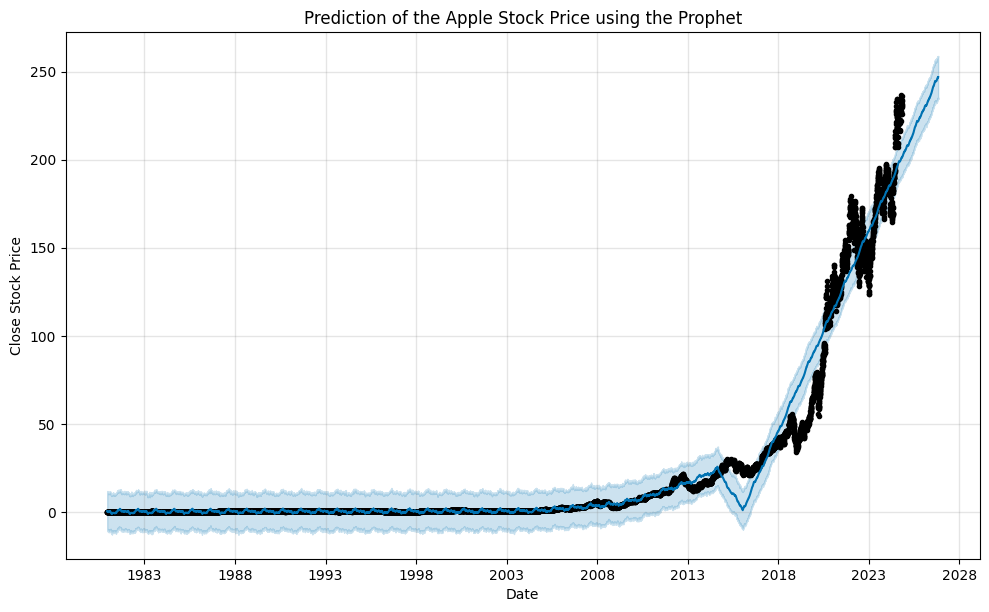

In [39]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Apple Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

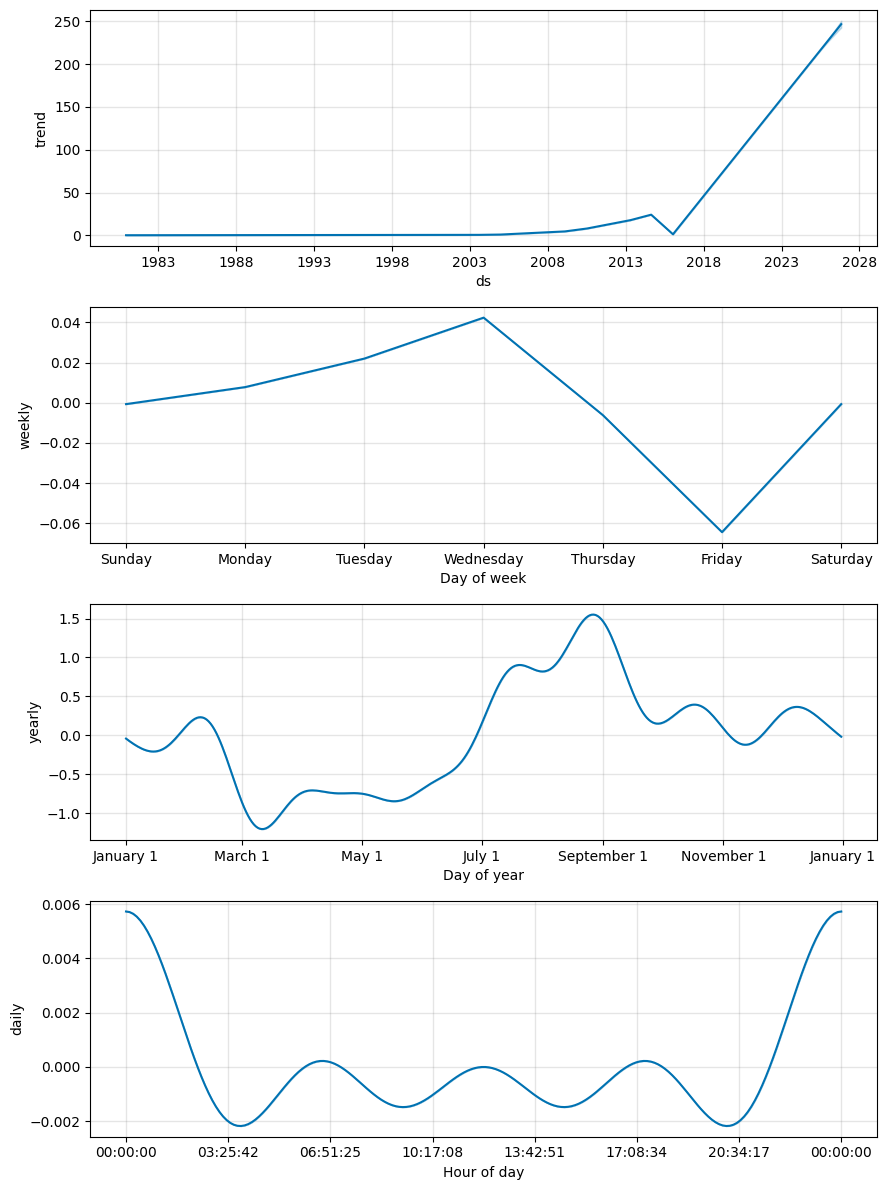

In [40]:
m.plot_components(prediction)
plt.show()

# MICROSOFT

In [41]:
# Load the dataset using pandas
data = pd.read_csv("/content/MSFT.csv")
data.head()

,date,open,high,low,close,volume
0,13-03-1986,0.0549,0.0630,0.0549,0.0603,1031788800
1,14-03-1986,0.0603,0.0635,0.0603,0.0624,308160000
2,17-03-1986,0.0624,0.0640,0.0624,0.0635,133171200
3,18-03-1986,0.0635,0.0640,0.0614,0.0619,67766400
4,19-03-1986,0.0619,0.0624,0.0603,0.0608,47894400


In [42]:
data.describe()

,open,high,low,close,volume
count,9738.000000,9738.000000,9738.000000,9738.000000,9.738000e+03
mean,55.260706,55.809231,54.686784,55.269454,5.644790e+07
std,94.644775,95.496478,93.709465,94.643695,3.816499e+07
min,0.054900,0.057100,0.054900,0.056000,2.304000e+06
25%,3.590450,3.638875,3.532350,3.590450,3.163542e+07
50%,19.276500,19.537100,19.095550,19.294850,4.963274e+07
75%,39.545450,39.937950,39.234450,39.541200,7.035660e+07
max,466.169600,467.517200,463.634100,466.728600,1.031789e+09


In [43]:
# Select only the 'date' and 'close' columns
data = data[["date", "close"]]

# Rename the columns for model fitting
data = data.rename(columns={"date": "ds", "close": "y"})

# Display the first few rows to confirm the changes
data.head()


,ds,y
0,13-03-1986,0.0603
1,14-03-1986,0.0624
2,17-03-1986,0.0635
3,18-03-1986,0.0619
4,19-03-1986,0.0608


In [44]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/ic2_12z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/arw56k_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38088', 'data', 'file=/tmp/tmpok10mq0i/ic2_12z9.json', 'init=/tmp/tmpok10mq0i/arw56k_f

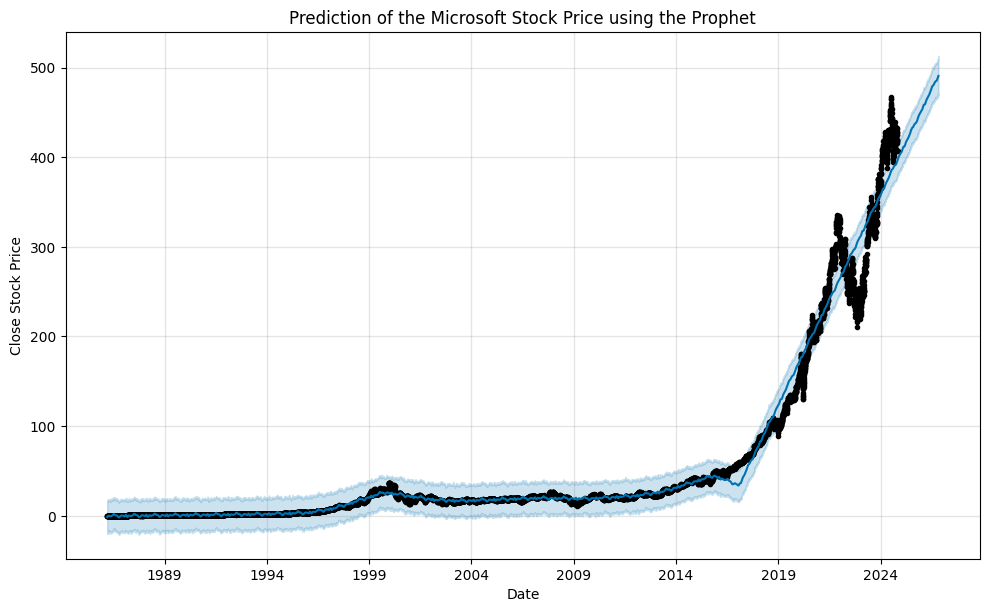

In [45]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Microsoft Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

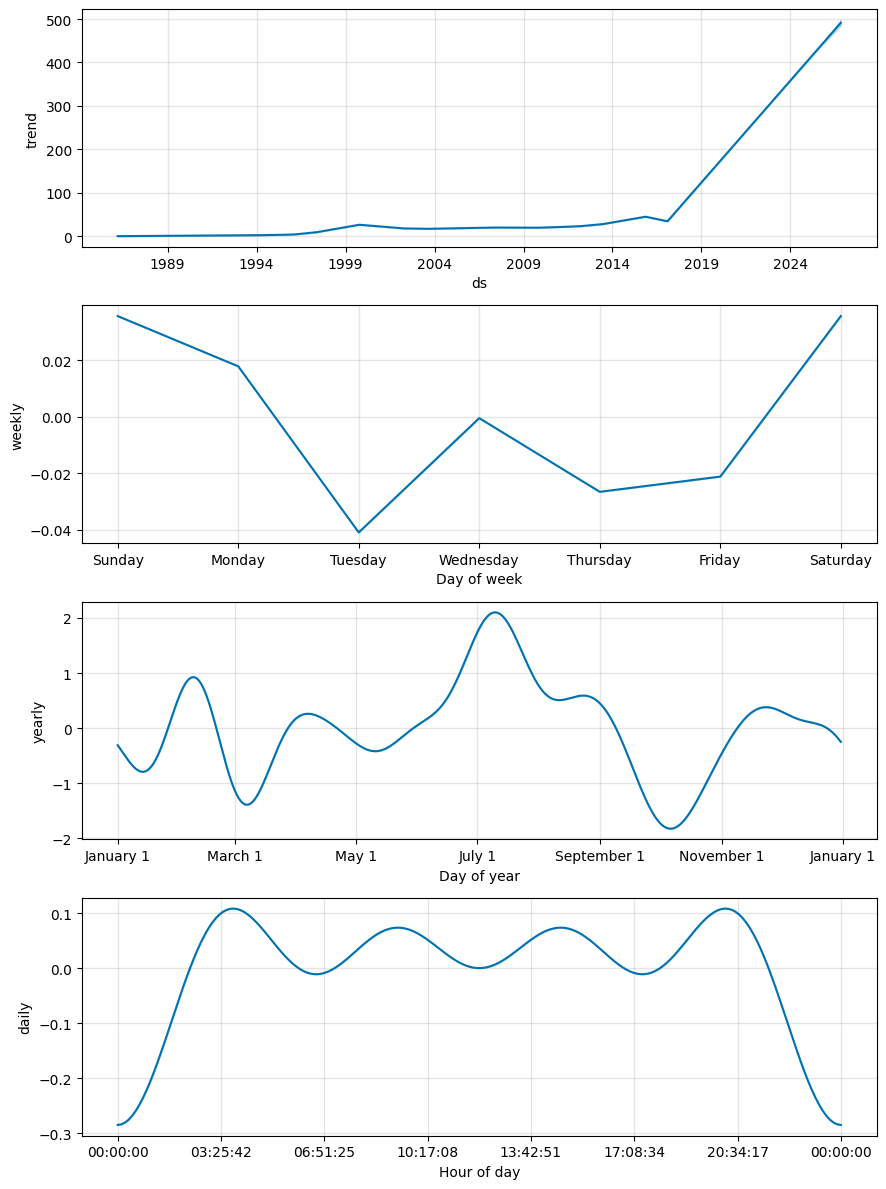

In [46]:
m.plot_components(prediction)
plt.show()

# S&P Global

In [47]:
# Load the dataset using pandas
data = pd.read_csv("/content/SGPI.csv")
data.head()

,date,open,high,low,close,volume
0,28-04-2016,100.9482,100.9482,98.7679,99.4146,971815
1,29-04-2016,98.5369,99.1836,97.8348,98.7125,1791105
2,02-05-2016,99.3961,99.5624,97.3267,99.0081,2120658
3,03-05-2016,94.4997,97.1234,94.2411,96.5414,1398093
4,04-05-2016,96.0426,97.0311,95.4328,96.3474,956322


In [48]:
data.describe()

,open,high,low,close,volume
count,2144.000000,2144.000000,2144.000000,2144.000000,2.144000e+03
mean,284.602455,287.319058,281.880621,284.653594,1.350118e+06
std,117.025227,118.021149,115.924930,116.981361,7.270636e+05
min,93.012400,94.202000,90.213100,92.107400,2.537180e+05
25%,178.276375,180.293275,176.820600,178.740700,9.052118e+05
50%,310.293650,314.169250,306.222750,310.218000,1.166865e+06
75%,378.694850,382.686950,375.498550,379.557775,1.585452e+06
max,531.740000,533.290000,527.830000,529.000000,9.770441e+06


In [49]:
# Select only the 'date' and 'close' columns
data = data[["date", "close"]]

# Rename the columns for model fitting
data = data.rename(columns={"date": "ds", "close": "y"})

# Display the first few rows to confirm the changes
data.head()


,ds,y
0,28-04-2016,99.4146
1,29-04-2016,98.7125
2,02-05-2016,99.0081
3,03-05-2016,96.5414
4,04-05-2016,96.3474


In [50]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/2gyxwyau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/_2_nv15l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60127', 'data', 'file=/tmp/tmpok10mq0i/2gyxwyau.json', 'init=/tmp/tmpok10mq0i/_2_nv15l

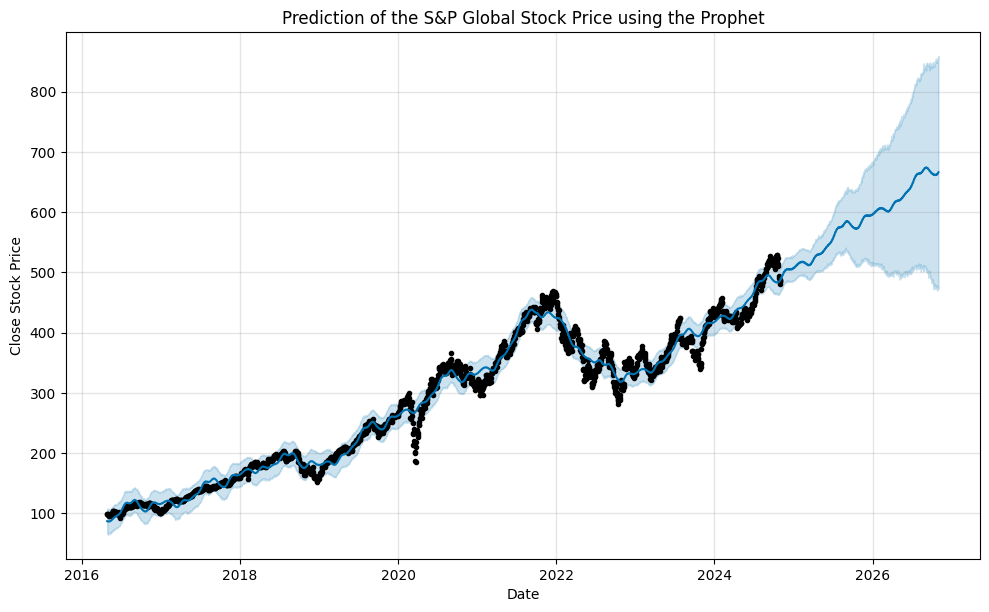

In [51]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the S&P Global Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

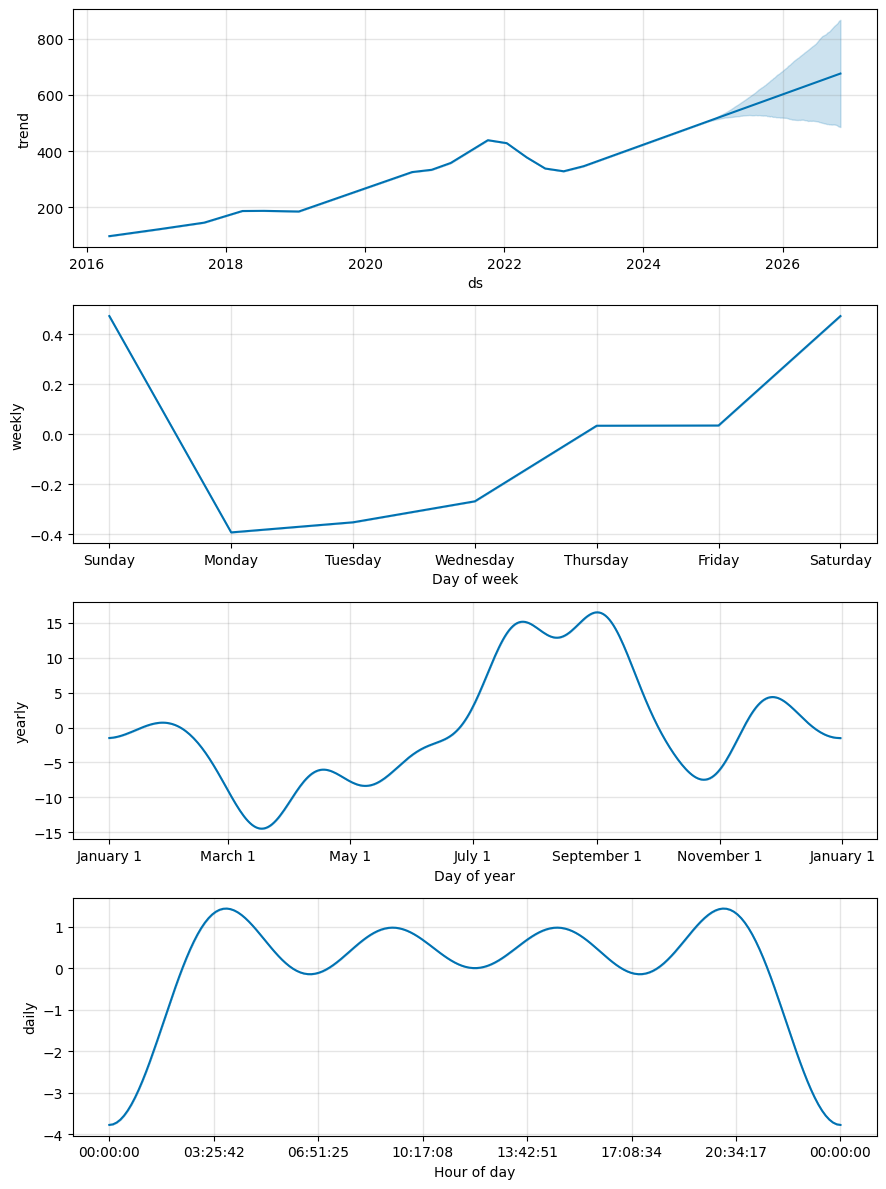

In [52]:
m.plot_components(prediction)
plt.show()

# BitCoin

In [53]:
# Load the dataset using pandas
data = pd.read_csv("/content/BTC-USD.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/04/2024,"67,858.0","68,807.0","69,505.0","66,881.0",0.63K,-1.38%
1,11/03/2024,"68,807.0","69,292.0","69,405.0","67,532.0",1.04K,-0.70%
2,11/02/2024,"69,292.0","69,590.0","69,939.0","69,028.0",0.37K,-0.43%
3,11/01/2024,"69,590.0","70,299.0","71,637.0","68,889.0",0.92K,-1.01%
4,10/31/2024,"70,299.0","72,455.0","72,664.0","69,674.0",0.40K,-2.98%


In [54]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3716,3716,3716,3716,3716,3706,3716
unique,3716,3583,3568,3534,3537,2069,1279
top,11/04/2024,604.1,604.1,604.1,604.1,1.16K,0.00%
freq,1,7,8,7,7,11,18


In [55]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [56]:
# Select only the 'Date' and 'Price' columns
data = data[["Date", "Price"]]

# Rename the columns for model fitting
data = data.rename(columns={"Date": "ds", "Price": "y"})

# Remove commas and convert 'y' column to numeric
data['y'] = data['y'].str.replace(',', '').astype(float)  # This line is added to fix the error

# Display the first few rows to confirm the changes
data.head()


,ds,y
0,11/04/2024,67858.0
1,11/03/2024,68807.0
2,11/02/2024,69292.0
3,11/01/2024,69590.0
4,10/31/2024,70299.0


In [57]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/5wu0jsic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok10mq0i/qfko9o14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57247', 'data', 'file=/tmp/tmpok10mq0i/5wu0jsic.json', 'init=/tmp/tmpok10mq0i/qfko9o14.json', 'output', 'file=/tmp/tmpok10mq0i/prophet_modelvce1e8po/prophet_model-20241105011801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


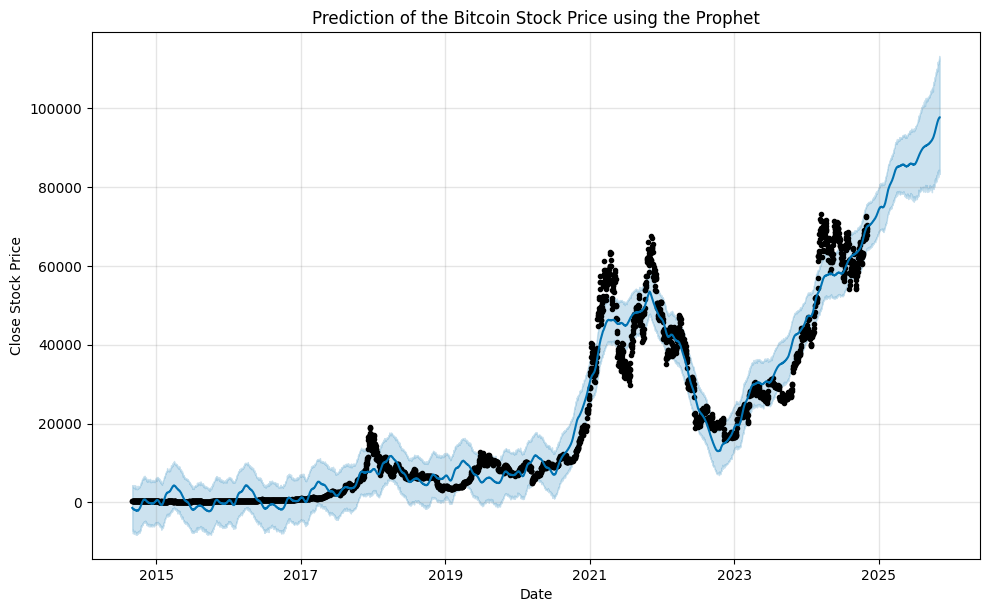

In [58]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

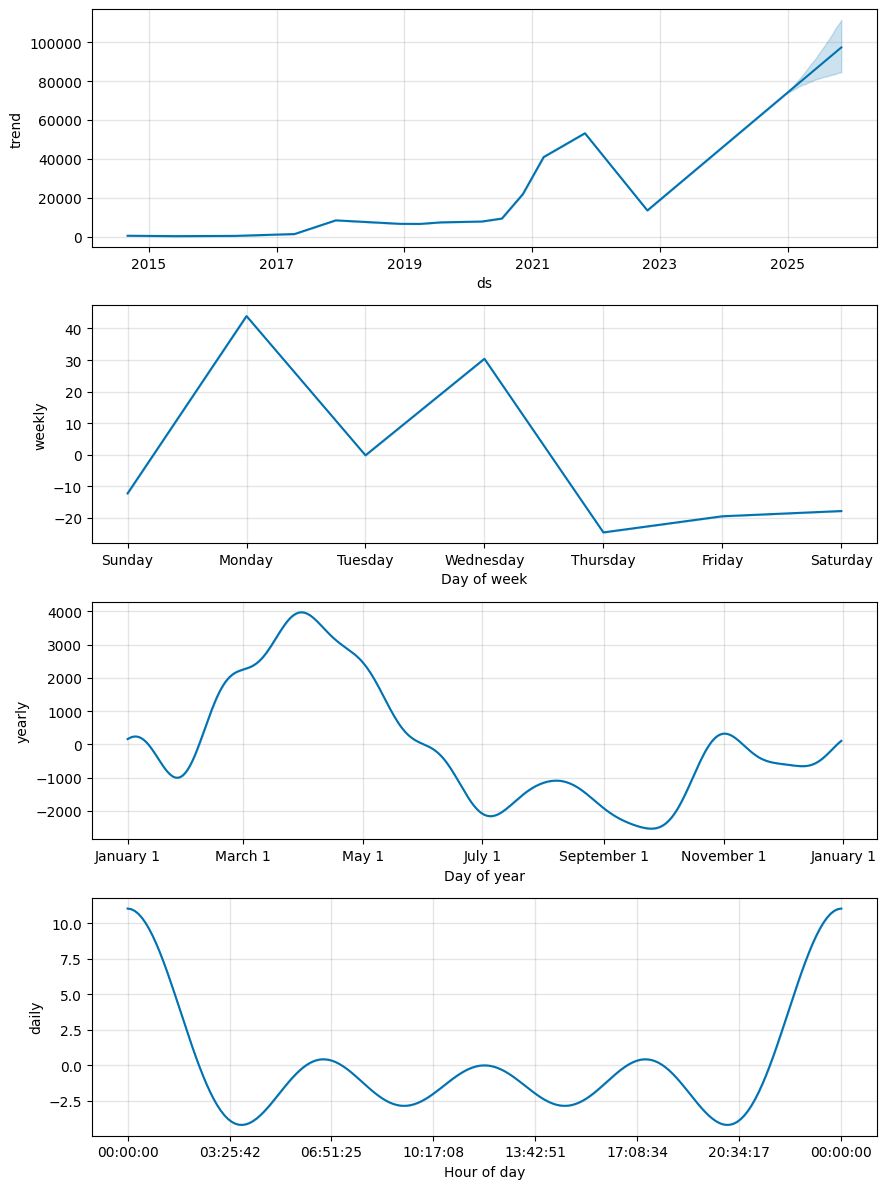

In [59]:
m.plot_components(prediction)
plt.show()